# Predicting Profit using Multiple Linear Regression Model
## Objective:
## • To predict the profit made by a startup on the basis of expenses incurred.

### Importing libraries

In [7]:
import numpy as np
import seaborn as sns 
import pandas as pd

import matplotlib.pyplot as plt
from numpy import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [8]:
#pandas version
print("pandas version: {}".format(pd.__version__))

#numpy version
print("numpy version: {}".format(np.__version__))

#seaborn version
print("seaborn version: {}".format(sns.__version__))

#sklearn version
print("sklearn version: {}".format(sklearn.__version__))

pandas version: 1.4.2
numpy version: 1.21.5
seaborn version: 0.11.2
sklearn version: 1.0.2


### Importing the dataset



In [57]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')

### Analyzing the data

In [ ]:
dataset.head()

In [59]:
len(dataset)

50

In [60]:
dataset.tail()

,R&D Spend,Administration,Marketing Spend,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


### Dimensions of dataset

In [61]:
dataset.shape

(50, 4)

### Checking of NULL values

In [62]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

### Schema of Database


In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


### To check correlation between columns

In [64]:
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### Exploratory Data Analysis (EDA) On Dataset

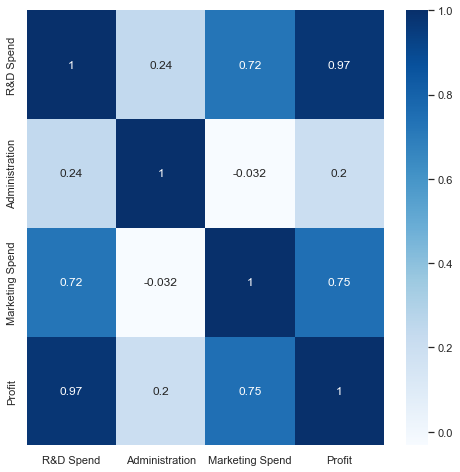

In [65]:
sns.heatmap(dataset.corr(),annot=True,cmap='Blues')
plt.show()

### Visualizing the correlation of ''Profit" with other variable. 

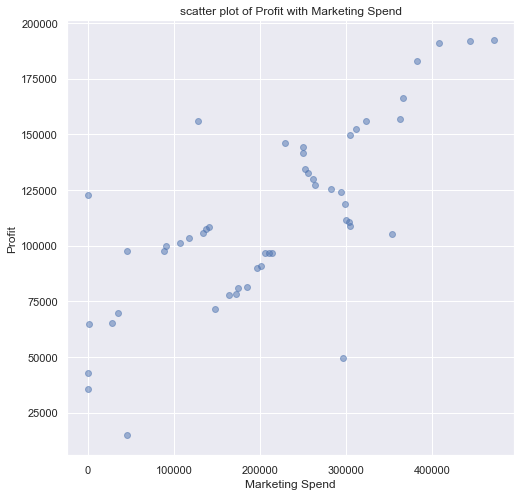

In [67]:
#for marketing spend
plt.scatter(dataset[ 'Marketing Spend'], dataset['Profit'], alpha=0.5)
plt.title('scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()


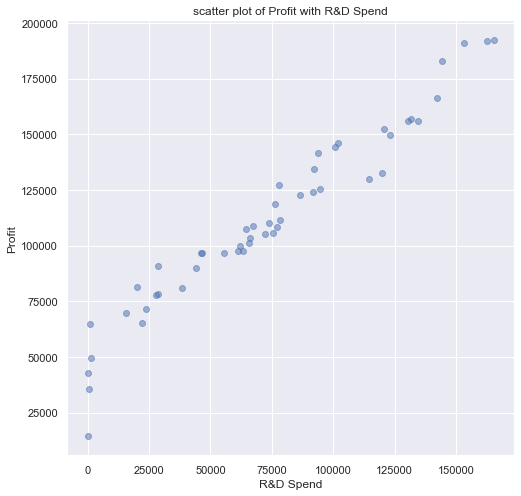

In [68]:
#for R&D Spend
plt.scatter(dataset[ 'R&D Spend'], dataset['Profit'], alpha=0.5)
plt.title('scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()


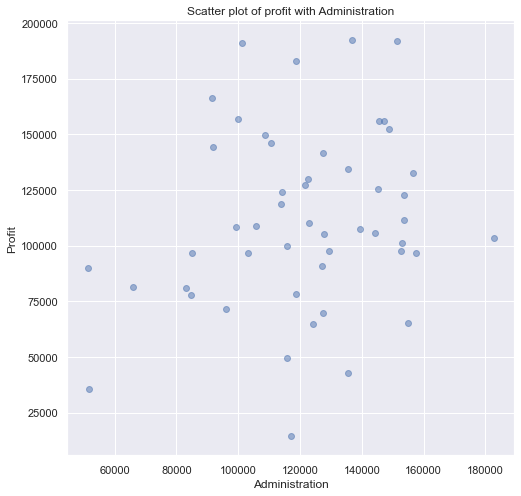

In [69]:
# for Administration 
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()


### Representing data in form of Histogram

In [70]:
sns.set(rc = {'figure.figsize':(8,8)})


array([[<AxesSubplot:title={'center':'R&D Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing Spend'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

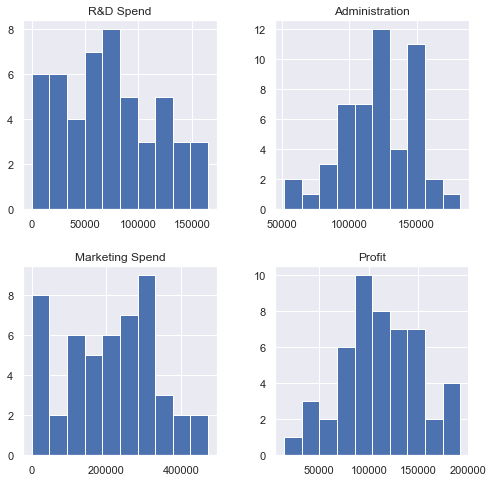

In [72]:
dataset.hist()

### Outliers detection in the target variable.

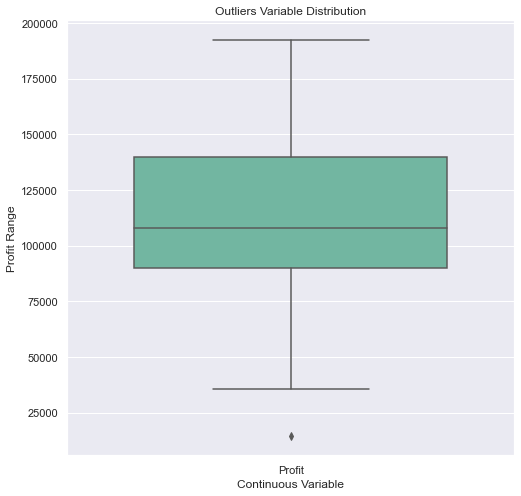

In [73]:
outliers = ['Profit']
sns.boxplot(data=dataset[outliers], orient="v", palette="Set2" , width=0.7) # orient = "v" = vertical boxplot , 
                                                                            # orient = "h" =hotrizontal boxplot
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")
plt.show()

### Dividing the dataset into dependent & Independet Variables

In [74]:
dependent_variable ='Profit'

In [75]:
# Create a list of independent variables
independent_variables = dataset.columns.tolist()


In [76]:
independent_variables


['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

In [78]:
independent_variables.remove(dependent_variable)


In [79]:
independent_variables

['R&D Spend', 'Administration', 'Marketing Spend']

# 

### Creating dataset for modling

In [80]:
# create the data of independent variables
X = dataset[independent_variables].values
# Create the dependent variable data
y = dataset[dependent_variable].values


### creating 4 parts, train and test, from dependent and independent variables. 
### Let's use train_test_split for this.


In [81]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Checking 4 parts of varibles. 

In [82]:
X_train[0:10]

array([[ 55493.95, 103057.49, 214634.81],
       [ 46014.02,  85047.44, 205517.64],
       [ 75328.87, 144135.98, 134050.07],
       [ 46426.07, 157693.92, 210797.67],
       [ 91749.16, 114175.79, 294919.57],
       [130298.13, 145530.06, 323876.68],
       [119943.24, 156547.42, 256512.92],
       [  1000.23, 124153.04,   1903.93],
       [   542.05,  51743.15,      0.  ],
       [ 65605.48, 153032.06, 107138.38]])

In [83]:
X_test[0:10]

array([[ 66051.52, 182645.56, 118148.2 ],
       [100671.96,  91790.61, 249744.55],
       [101913.08, 110594.11, 229160.95],
       [ 27892.92,  84710.77, 164470.71],
       [153441.51, 101145.55, 407934.54],
       [ 72107.6 , 127864.55, 353183.81],
       [ 20229.59,  65947.93, 185265.1 ],
       [ 61136.38, 152701.92,  88218.23],
       [ 73994.56, 122782.75, 303319.26],
       [142107.34,  91391.77, 366168.42]])

In [84]:
y_train[0:10]

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64])

In [85]:
y_test[0:10]

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

# 

### Fitting multiple Linear Regression to the Training set.



In [86]:
# Fitting multiple Linear Regression to the Training set.
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

### # Predicting the Test set results.

In [87]:
# Predicting the Test set results
y_pred = reg.predict(X_test)
y_pred

array([103901.8969696 , 132763.05993126, 133567.90370044,  72911.78976736,
       179627.92567224, 115166.64864795,  67113.5769057 ,  98154.80686776,
       114756.11555221, 169064.01408795])

### collecting the estimates and actual values in a data frame and take a look at it.

In [88]:
dataset_comp = pd.DataFrame({'Actual Values': y_test, 'Estimates': y_pred})
dataset_comp


,Actual Values,Estimates
0,103282.38,103901.896970
1,144259.40,132763.059931
2,146121.95,133567.903700
3,77798.83,72911.789767
4,191050.39,179627.925672
5,105008.31,115166.648648
6,81229.06,67113.576906
7,97483.56,98154.806868
8,110352.25,114756.115552
9,166187.94,169064.014088


### Let's include the metrics hosted by sklearn in the kernel and display the MAE, MSE, SRMSE values.

In [89]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

7320.441614848123

In [90]:
MSE = mean_squared_error(y_test, y_pred) 
MSE

77506468.16885388

In [91]:
SRMSE = math.sqrt(MSE)
SRMSE

8803.77579046933

In [92]:
r2_score(y_test, y_pred)

0.9393955917820572

### The model score is close 0.9393 which is pretty  close to 1.